# Paris Agreement

The Paris Agreement is a legally binding international climate treaty adopted by 196 countries at the UN Climate Change Conference (COP21) in Paris, in December 2015. It came into force on November 4, 2016.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading data

In [2]:
data_root = './data/'
df_co2 = pd.read_csv(f'{data_root}co2_emmisions_complicated.csv')
df_gdp = pd.read_csv(f'{data_root}co2-emissions-vs-gdp.csv')
df_pop = pd.read_csv(f'{data_root}world_population.csv')

In [3]:
# Filtering the data only for European countries
df_co2_europe = df_co2[df_co2['Region'].str.contains('Europe', case=False, na=False)]

# Add Russia
df_russia = df_co2[df_co2['Name'].str.contains('Russian Federation', case=False, na=False)].copy()
df_russia['Name'] = df_russia['Name'].replace('Russian Federation', 'Russia')

# Add Ukraine
df_ukraine = df_co2[df_co2['Name'].str.contains('Ukraine', case=False, na=False)].copy()

# Add Belarus
df_belarus = df_co2[df_co2['Name'].str.contains('Belarus', case=False, na=False)].copy()

# Add Moldova
df_moldova = df_co2[df_co2['Name'].str.contains('Moldova', case=False, na=False)].copy()
df_moldova['Name'] = df_moldova['Name'].replace('Moldova, Republic of', 'Moldova')

# Combine all
df_co2_europe = pd.concat([df_co2_europe, df_russia, df_ukraine, df_belarus, df_moldova]).drop_duplicates()

df_pop_europe = df_pop[df_pop['Continent'] == 'Europe']

In [4]:
row = df_co2_europe[df_co2_europe['Name'] == 'Serbia and Montenegro'].copy()

serbia_row = row.copy()
montenegro_row = row.copy()

serbia_row['Country_code'] = 'SRB'
serbia_row['Name'] = 'Serbia'

montenegro_row['Country_code'] = 'MNE'
montenegro_row['Name'] = 'Montenegro'

year_columns = [col for col in df_co2_europe.columns if col.isdigit()]

# Split the CO2 data by 85% and 15% because Serbia is much bigger than Montenegro by area and by population
serbia_row[year_columns] = row[year_columns] * 0.96
montenegro_row[year_columns] = row[year_columns] * 0.04

# Drop the original Serbia and Montenegro row
df_co2_europe = df_co2_europe[df_co2_europe['Name'] != 'Serbia and Montenegro']

# Append the two new rows
df_co2_europe = pd.concat([df_co2_europe, serbia_row, montenegro_row], ignore_index=True)

In [5]:
# european_countries = [
#     "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
#     "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark",
#     "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary",
#     "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein",
#     "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
#     "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania",
#     "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
#     "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican"
# ]
european_countries = [
    "Albania",
    "Andorra",
    "Austria",
    "Belarus",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czechia",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Holy See",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Russia",
    "San Marino",
    "Serbia",
    "Slovak",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Ukraine",
    "United Kingdom"
]

# Filter for European countries
df_gdp_europe = df_gdp[df_gdp['Entity'].isin(european_countries)].copy()

print(df_gdp_europe['Entity'].unique())
print(df_gdp_europe['Entity'].nunique())

['Albania' 'Andorra' 'Austria' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro' 'Netherlands'
 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania' 'Russia'
 'San Marino' 'Serbia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom']
43


Let’s identify the worst CO₂-emitting countries in Europe per capita and see whether their emissions have changed after the Paris Agreement.

In [6]:
# Filter data for years before 2015
df_before_2015 = df_gdp_europe[(df_gdp_europe['Year'] > 1990) & (df_gdp_europe['Year'] < 2015)]

# Group by country and calculate average CO2 emissions per capita before 2015
avg_co2_per_capita = df_before_2015.groupby(['Entity', 'Code'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# Sort countries by descending average emissions to get worst emitters
worst_countries_per_capita = avg_co2_per_capita.sort_values(by='Annual CO₂ emissions (per capita)', ascending=False)

# Optionally get top 10 worst emitters
top_10_worst = worst_countries_per_capita.head(10)

print(top_10_worst)

         Entity Code  Annual CO₂ emissions (per capita)
23   Luxembourg  LUX                          23.182717
11      Estonia  EST                          13.342880
9       Czechia  CZE                          12.159366
4       Belgium  BEL                          11.506794
12      Finland  FIN                          11.451900
34       Russia  RUS                          11.241805
14      Germany  DEU                          10.903650
28  Netherlands  NLD                          10.717880
10      Denmark  DNK                          10.324263
18      Ireland  IRL                          10.212690


## Main Goals in Paris Agreement:
- Limit global warming to well below 2°C, and ideally to 1.5°C above pre-industrial levels.
- Reduce global greenhouse gas emissions as soon as possible.
- Reach net-zero emissions by the second half of the century.

### Pre-Agreement

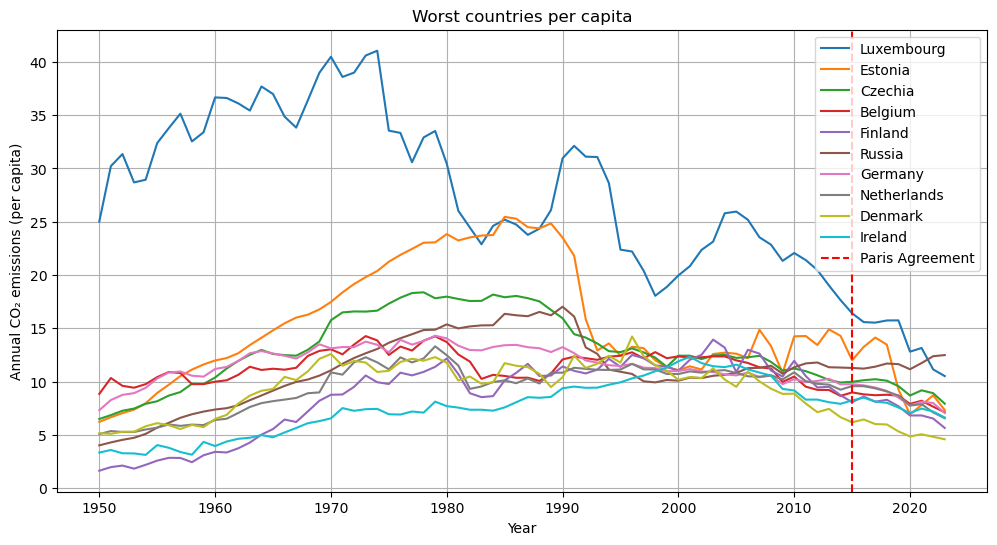

In [7]:
df_after_2015 = df_gdp_europe[df_gdp_europe['Year'] >= 1950]

plt.figure(figsize=(12, 6))

for country in top_10_worst['Entity']:
    country_data = df_after_2015[df_after_2015['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Annual CO₂ emissions (per capita)'], label=country)

plt.axvline(x=2015, color='red', linestyle='--', label="Paris Agreement")
plt.title('Worst countries per capita')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ emissions (per capita)')
plt.legend()
plt.grid(True)
plt.show()

To observe how countries behave before and after the agreement, we can calculate the average values for the periods before and after, and display the results using a bar chart.

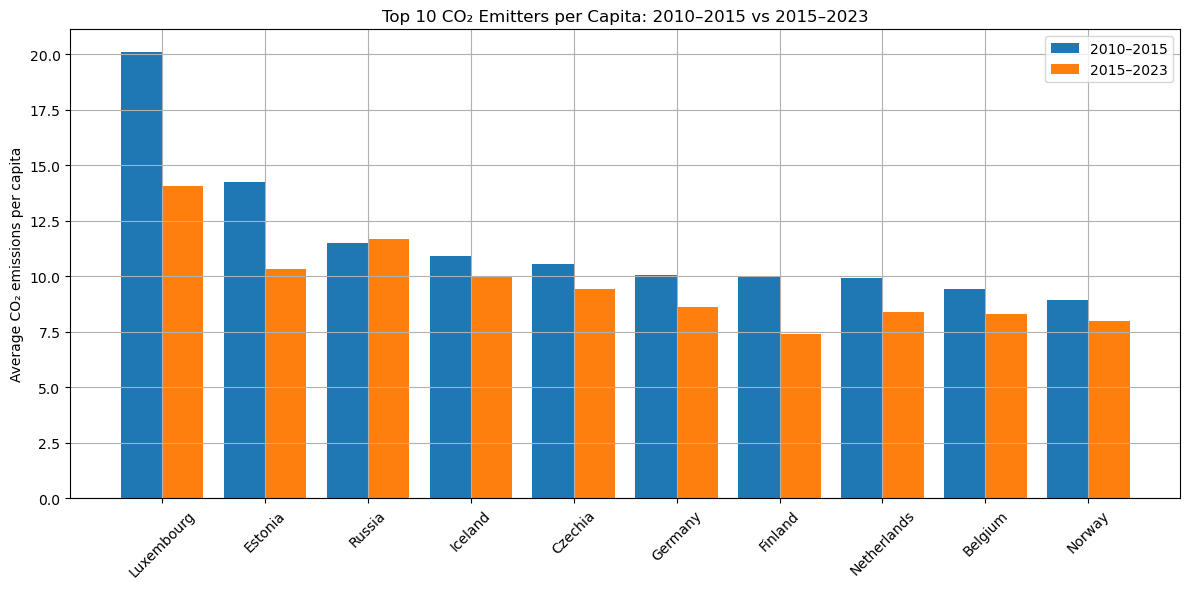

In [8]:
# Filter data for both periods
df_2010_2015 = df_gdp_europe[(df_gdp_europe['Year'] >= 2010) & (df_gdp_europe['Year'] < 2015)]
df_2015_2023 = df_gdp_europe[(df_gdp_europe['Year'] >= 2015) & (df_gdp_europe['Year'] <= 2023)]

# Group and calculate average CO2 per capita
avg_2010_2015 = df_2010_2015.groupby(['Entity', 'Code'])['Annual CO₂ emissions (per capita)'].mean().reset_index()
avg_2015_2023 = df_2015_2023.groupby(['Entity', 'Code'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# Rename columns for clarity
avg_2010_2015.rename(columns={'Annual CO₂ emissions (per capita)': 'avg_co2_2010_2015'}, inplace=True)
avg_2015_2023.rename(columns={'Annual CO₂ emissions (per capita)': 'avg_co2_2015_2023'}, inplace=True)

# Merge the two averages
merged_avg = pd.merge(avg_2010_2015, avg_2015_2023, on=['Entity', 'Code'], how='inner')

# Sort by 2010–2015 emissions to get top emitters before Paris Agreement
top_emitters = merged_avg.sort_values(by='avg_co2_2010_2015', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
x = range(len(top_emitters))

plt.bar(x, top_emitters['avg_co2_2010_2015'], width=0.4, label='2010–2015', align='center')
plt.bar([i + 0.4 for i in x], top_emitters['avg_co2_2015_2023'], width=0.4, label='2015–2023', align='center')

plt.xticks([i + 0.2 for i in x], top_emitters['Entity'], rotation=45)
plt.ylabel('Average CO₂ emissions per capita')
plt.title('Top 10 CO₂ Emitters per Capita: 2010–2015 vs 2015–2023')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


While most EU countries show a noticeable decline in CO₂ emissions per capita following the Paris Agreement, countries like  Russia exhibit a slight upward trend. 

This suggests that while broader European policies and commitments led to reductions in many states, these countries may have faced challenges such as continued reliance on fossil fuels, limited policy enforcement, or slower adoption of renewable energy technologies.

We can assess whether the EU enforces the Paris Agreement more strictly by comparing its performance with some of the non-EU emitters.

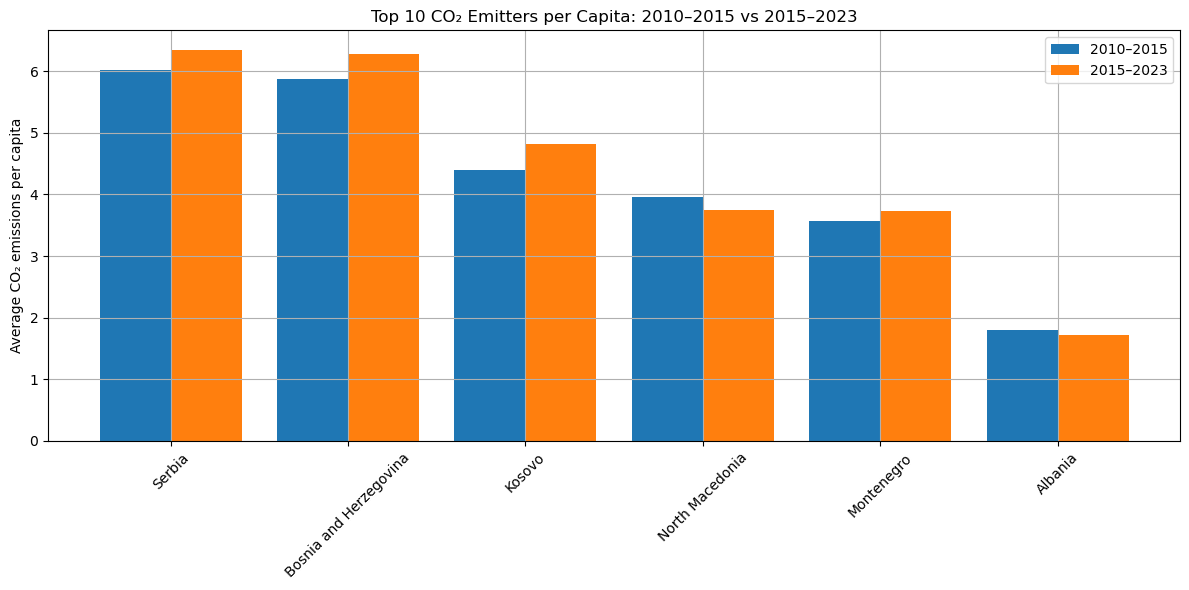

In [9]:
non_eu = ['Albania', 'Bosnia and Herzegovina', 'Serbia', 'North Macedonia', 'Montenegro', 'Kosovo']

df_non_eu = df_gdp[df_gdp['Entity'].isin(non_eu)].copy()


# Filter data for both periods
df_2010_2015ne = df_non_eu[(df_non_eu['Year'] >= 2010) & (df_non_eu['Year'] < 2015)]
df_2015_2023ne = df_non_eu[(df_non_eu['Year'] >= 2015) & (df_non_eu['Year'] <= 2023)]

# Group and calculate average CO2 per capita
avg_2010_2015ne = df_2010_2015ne.groupby(['Entity', 'Code'])['Annual CO₂ emissions (per capita)'].mean().reset_index()
avg_2015_2023ne = df_2015_2023ne.groupby(['Entity', 'Code'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# Rename columns for clarity
avg_2010_2015ne.rename(columns={'Annual CO₂ emissions (per capita)': 'avg_co2_2010_2015'}, inplace=True)
avg_2015_2023ne.rename(columns={'Annual CO₂ emissions (per capita)': 'avg_co2_2015_2023'}, inplace=True)

# Merge the two averages
merged_avg = pd.merge(avg_2010_2015ne, avg_2015_2023ne, on=['Entity', 'Code'], how='inner')

# Sort by 2010–2015 emissions to get top emitters before Paris Agreement
top_emitters_ne= merged_avg.sort_values(by='avg_co2_2010_2015', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
x = range(len(top_emitters_ne))

plt.bar(x, top_emitters_ne['avg_co2_2010_2015'], width=0.4, label='2010–2015', align='center')
plt.bar([i + 0.4 for i in x], top_emitters_ne['avg_co2_2015_2023'], width=0.4, label='2015–2023', align='center')

plt.xticks([i + 0.2 for i in x], top_emitters_ne['Entity'], rotation=45)
plt.ylabel('Average CO₂ emissions per capita')
plt.title('Top 10 CO₂ Emitters per Capita: 2010–2015 vs 2015–2023')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

- ### Limit global warming to well below 2°C, and ideally to 1.5°C above pre-industrial levels.


The temperature data represents the anomaly, or change, relative to the average climate conditions during the baseline period from 1951 to 1980, highlighting the difference in temperature compared to that historical reference.

As the dataset included information on countries worldwide, we decided to narrow our focus to a more manageable scope by analyzing data specifically related to European countries.


In [10]:
df_climate = pd.read_csv(f'{data_root}Climate_Indicators_Annual_Mean_Global_Surface_Temperature.csv')

europe_iso3 = [
    # Modern European countries
    'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE',
    'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA',
    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD',
    'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP',
    'SWE', 'CHE', 'UKR', 'GBR', 'VAT', 'XKX',  # XKX = Kosovo

    # historical ones, just in case
    'CSK',  # Czechoslovakia
    'YUG',  # Yugoslavia
    'SUN',  # Soviet Union
]

df_europe_climate = df_climate[df_climate['ISO3'].isin(europe_iso3)].copy()

In [11]:
# Keep only relevant columns for clarity
temp_cols = ['Country', 'ISO3'] + [str(year) for year in range(1970, 2023)]

df_europe_climate = df_europe_climate[temp_cols]

# Melt to long format
europe_long = df_europe_climate.melt(
    id_vars=['Country', 'ISO3'],       # fixed columns
    var_name='Year',                   # new column for years
    value_name='Temperature Change'    # values for each year
)

# Rename columns to match your CO2 dataset if needed
europe_long.rename(columns={
    'Country': 'Entity',
    'ISO3': 'Code'
}, inplace=True)

# Convert year to integer
europe_long['Year'] = europe_long['Year'].astype(int)

# Drop rows with missing temperature data
europe_long = europe_long.dropna(subset=['Temperature Change'])

We merge the data for better management

In [12]:
merged_df = pd.merge(
    df_gdp_europe,             
    europe_long,
    on=['Entity', 'Code', 'Year'],
    how='inner'
)

With the help of heatmaps we can display the average temperature change for each country during two periods: before and after the Paris Agreement. 

In [13]:
# Read the merged dataset
df = merged_df

# Filter relevant years
pre_agreement = df[(df['Year'] >= 2000) & (df['Year'] <= 2015)]
post_agreement = df[(df['Year'] > 2015) & (df['Year'] <= 2023)]

# Group by country and calculate average temperature change
pre_avg = pre_agreement.groupby('Entity')['Temperature Change'].mean().reset_index()
pre_avg['Period'] = '2010–2015'

post_avg = post_agreement.groupby('Entity')['Temperature Change'].mean().reset_index()
post_avg['Period'] = '2016–2023'

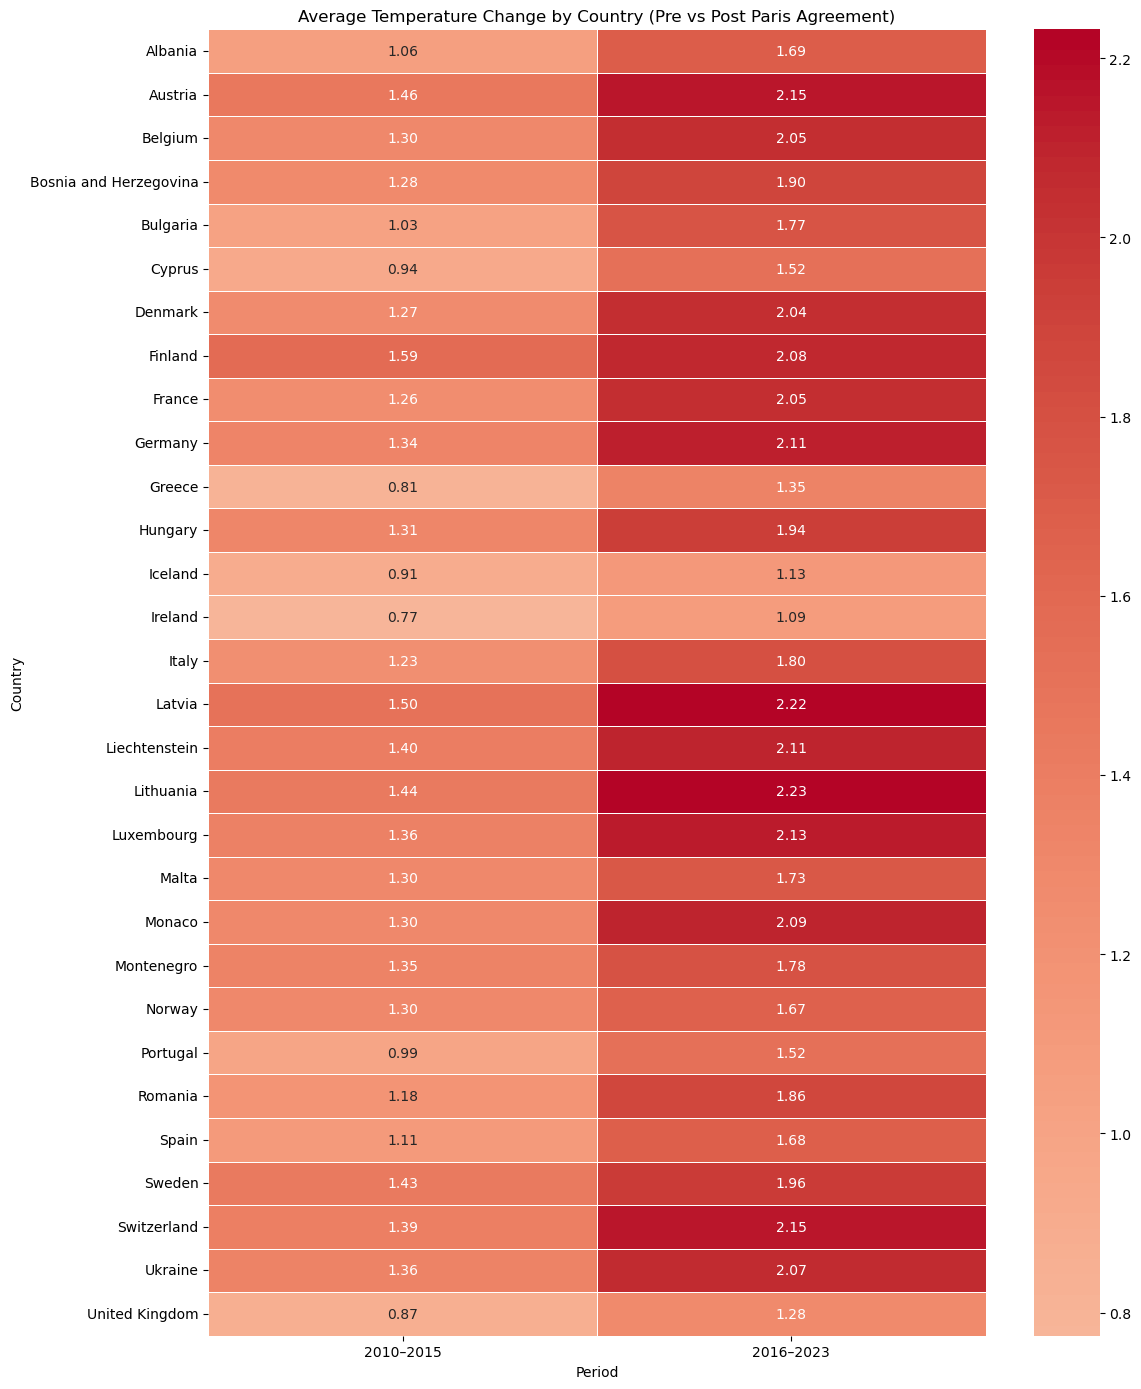

In [14]:
# Combine both periods
combined_avg = pd.concat([pre_avg, post_avg])

# Pivot for heatmap format
heatmap_data = combined_avg.pivot(index='Entity', columns='Period', values='Temperature Change')

# Plot heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
plt.title('Average Temperature Change by Country (Pre vs Post Paris Agreement)')
plt.xlabel('Period')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

By comparing these maps, we can visually assess how temperature patterns have shifted over time across Europe. Areas with warmer colors indicate higher temperature changes, helping to identify regions experiencing greater warming and to see if there are noticeable differences in temperature trends pre- and post-agreement.

In [15]:
# Pre (5-year average before 2015)
# Post (5-year average after 2015)
pre_df = merged_df[(merged_df['Year'] >= 2010) & (merged_df['Year'] < 2015)]
post_df = merged_df[(merged_df['Year'] >= 2015) & (merged_df['Year'] <= 2023)]

# Country averages
pre_avg = pre_df.groupby('Entity')['Temperature Change'].mean().reset_index(name='Pre_Avg')
post_avg = post_df.groupby('Entity')['Temperature Change'].mean().reset_index(name='Post_Avg')

# Global averages (assuming your dataframe includes global or you calculate it)
global_pre_avg = pre_df['Temperature Change'].mean()
global_post_avg = post_df['Temperature Change'].mean()

# Merge for scatter plotting
deviation_df = pd.merge(pre_avg, post_avg, on='Entity')
deviation_df['Pre_Deviation'] = deviation_df['Pre_Avg'] - global_pre_avg
deviation_df['Post_Deviation'] = deviation_df['Post_Avg'] - global_post_avg

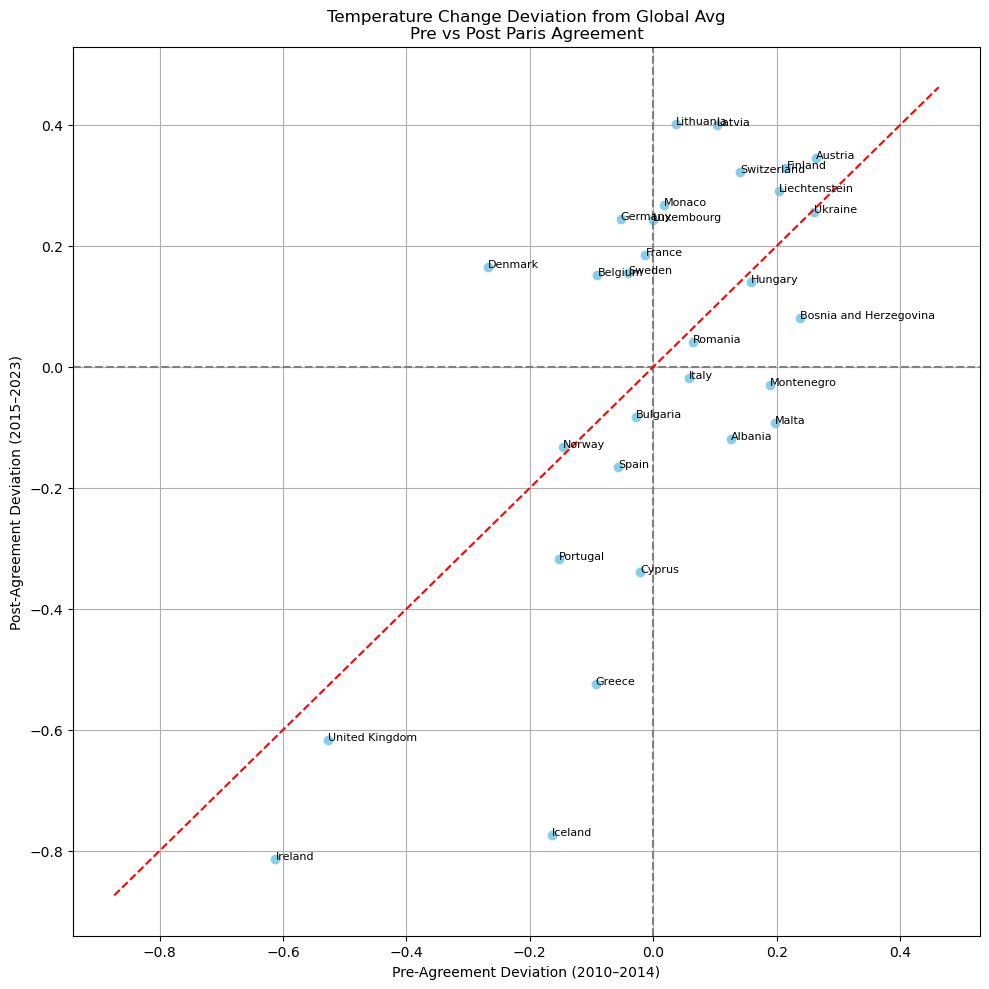

In [16]:
# Rename columns for clarity
deviation_df = deviation_df.rename(columns={
    'Temperature Change_x': 'Pre_Avg',
    'Temperature Change_y': 'Post_Avg'
})

# Calculate global averages
global_pre_avg = deviation_df['Pre_Avg'].mean()
global_post_avg = deviation_df['Post_Avg'].mean()

# Compute deviation from global average
deviation_df['Pre_Deviation'] = deviation_df['Pre_Avg'] - global_pre_avg
deviation_df['Post_Deviation'] = deviation_df['Post_Avg'] - global_post_avg

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(deviation_df['Pre_Deviation'], deviation_df['Post_Deviation'], color='skyblue')

# Add horizontal and vertical lines at 0
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

lims = [
    np.min([plt.xlim()[0], plt.ylim()[0]]),  # min of x and y axis limits
    np.max([plt.xlim()[1], plt.ylim()[1]])   # max of x and y axis limits
]
plt.plot(lims, lims, 'r--', label='Global Trend (y=x)')

# Annotate country names
for i, row in deviation_df.iterrows():
    plt.text(row['Pre_Deviation'], row['Post_Deviation'], row['Entity'], fontsize=8)

plt.title('Temperature Change Deviation from Global Avg\nPre vs Post Paris Agreement')
plt.xlabel('Pre-Agreement Deviation (2010–2014)')
plt.ylabel('Post-Agreement Deviation (2015–2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

The red dashed line represents the point where the temperature deviation before and after the agreement are equal. If a country’s point lies above this line, it means its temperature deviation increased after the Paris Agreement. Conversely, points below the line indicate a decrease in deviation. This helps to visually compare how temperature changes differ across countries between the two periods.